In [72]:
import cv2
import skimage.transform
from skimage.transform import AffineTransform

from helper_loader import *

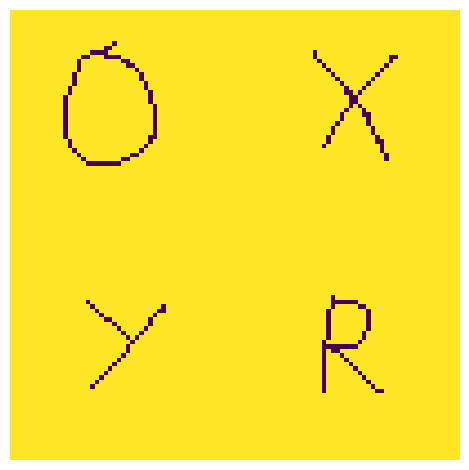

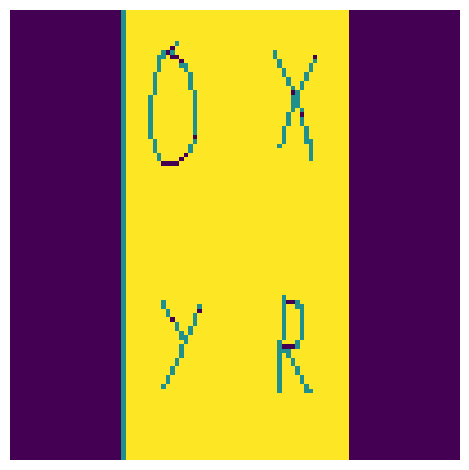

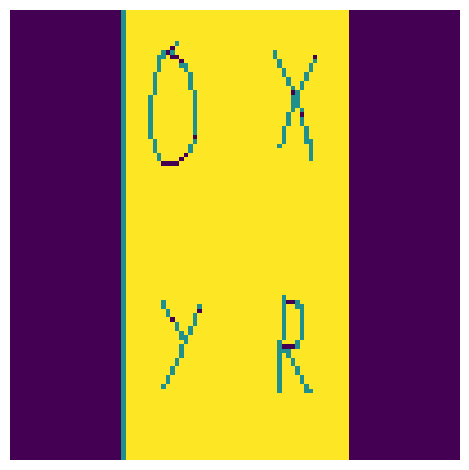

In [75]:
scale_x = 2
scale_y = 1

settings = AlignmentSettings(
    volume_path=Path("notebook_helpers.py"),
    volume_scaling=1.0,
    volume_settings=VolumeSettings(
        orientation=Orientation.CORONAL,
        resolution=Resolution.MICRONS_50,
        shape=(264, 180, 228),
    ),
    histology_path=Path("notebook_helpers.py"),
    histology_scaling=1.0,
    histology_downsampling=1,
    histology_settings=HistologySettings(
        rotation=0,
        translation_x=0,
        translation_y=0,
        scale_x=scale_x,
        scale_y=scale_y,
        shear_x=0.0,
        shear_y=0.0,
    ),
)

image = load_image("resources/test_image.png")[..., 0]
imshow(image)

forward = False
matrix = get_transformation_matrix_from_q_transform(
    recreate_q_transform_from_alignment(image.shape, settings, forward), forward
)

imshow(
    skimage.transform.warp(
        image, AffineTransform(matrix=matrix), order=1, preserve_range=True, clip=True
    )
)
imshow(
    cv2.warpPerspective(
        image, matrix, image.shape[::-1], flags=cv2.INTER_LINEAR | cv2.WARP_INVERSE_MAP
    )
)